In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [76]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense = Offense.replace(np.nan, 0)
Offense.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75.0,191,4.53,33.0,0.0,130.0,7.09,4.18,0,0.0
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75.0,229,4.91,34.0,0.0,108.0,7.71,4.59,Cleveland Browns,6.0
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71.0,180,4.59,36.0,0.0,123.0,7.22,4.16,Seattle Seahawks,6.0
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,0,76.0,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2.0
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71.0,193,4.50,0.0,0.0,0.0,0.00,0.00,Dallas Cowboys,5.0


In [77]:
X = Offense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Offense["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2910, 8) (2910, 1)


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.009079549123833464
Testing Score: 0.0063697320087848786


Text(0.5, 1.0, 'Residual Plot')

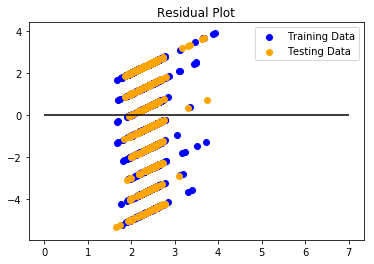

In [81]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")